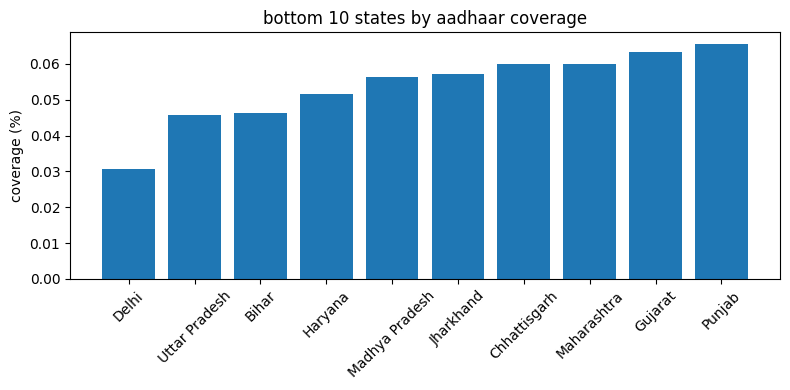

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolments")

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)

df=enrolments.merge(population,on="state",how="inner")
df["coverage_percent"]=(df["enrolments"]/df["population"])*100
df=df.sort_values("coverage_percent",ascending=True).head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["coverage_percent"])
plt.xticks(rotation=45)
plt.ylabel("coverage (%)")
plt.title("bottom 10 states by aadhaar coverage")
plt.tight_layout()
plt.show()
